In [15]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
np.random.randn(1)*4

array([ 7.6453095])

In [27]:
import numpy as np
def eval_params(x, y):
    return np.random.randn(1)*2
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
Z = np.zeros((len(X), len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i, j] = eval_params(X[i], Y[j])

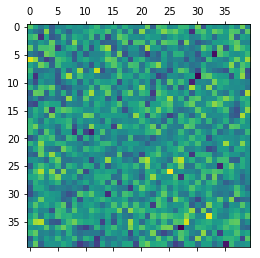

In [28]:
matshow(Z)

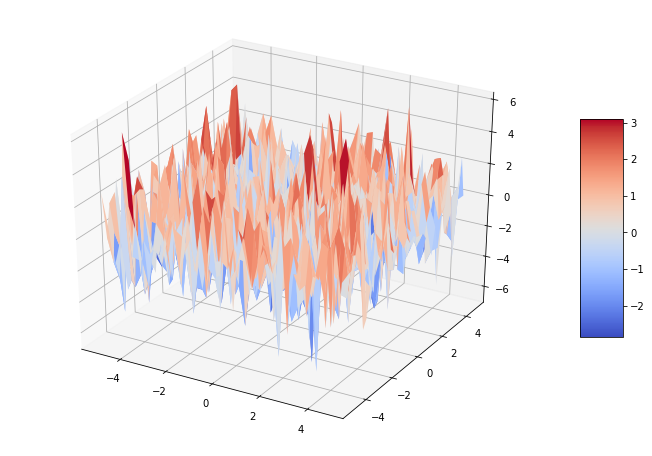

In [33]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
XX, YY = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

其中 import Axes3D 那句虽然没有直接用到，但是如果删掉的话在创建 3D projection 的 axes 的时候就会出错。plot_surface 这个函数负责绘制 3D surface，参数相当 straightforward。因为 Z 作为我们 evaluate 参数的结果是一个二维的矩阵，所以 plot_surface 需要的前两个参数也是二维矩阵，并且需要是和 Z 大小相同。

简单来说，对于一组 index (i, j)，XX[i, j], YY[i, j] 和 Z[i, j] 一起给出了一个位于曲面上的点的三维坐标。而 meshgrid 这个函数就是用于方便地根据原来的 X 和 Y 来创建这样的二维矩阵的。

到这里我们的目标其实已经达到了。如果把上面的 savefig 换成 plt.show() 的话，会弹出一个对话框来显示 3D 曲面图，好处在于可以对曲面进行旋转、缩放等交互操作，有时候对于看到曲面被挡住的部分来说非常有用。不过 Matplotlib 的 3D 操作交互反应速度相当缓慢，可能是没有用任何硬件加速之类的简单实现吧。如果你不能忍受那个缓慢的交互速度，或者需要将生成出来的图片发给别人看，而对方又不一定是能运行 Python 代码的，那还有一个选择就是生成内嵌 3D 对象的 PDF 文件。PDF 文件可以通过 PRC 格式内嵌 3D 图像模型，不过目前只有 Adobe 家的阅读器（比如 Adobe Reader 或者 Adobe Acrobat）可以查看这种格式的对象。在 Acrobat 里打开大概长下面这个样子，可以对 3D 曲面进行各种操作和检查。

http://freemind.pluskid.org/technology/plotting-3d-surfaces-in-python/

比如之前在网上看到这个 3D 的卡通画，简直太惊艳了，我觉得现在的各种 3D 游戏之类的都处于严重的 Uncanny Valley 之中，让我非常难以接受，相反若是做成这种风格，应该会（让我觉得）赏心悦目很多。然而虽然看起来只是简单的 line drawing 的结果，但是实际的制作过程还是要进行正儿八经的三维建模、渲染之类的，作者在这里给了制作过程介绍，看起来似乎还是相当费力的。另外还有这里也有一些非常漂亮的 3D 线条漫画，看起来都非常酷，而且都是直接在浏览器了渲染出来的，不需要额外安装什么很复杂的 viewer 。

就我所知范围，目前的绘图工具中似乎 plotly 算是对 webgl 支持比较好并且也简单易用的。它们的 3D 图大概长下面这个样子，这里有一个在线的例子可以直接进行交互，渲染和交互效果都挺好的。
https://sketchfab.com/models/fb049fba077945e185ac345b8fb537b3?ref=related
https://blog.sketchfab.com/art-spotlight-calvin-hobbes-3d-strip/
http://yiwenl.github.io/Sketches/exps/30/
https://plot.ly/python/3d-surface-plots/

In [ ]:
import plotly
import plotly.graph_objs as go
data = [go.Surface(z=Z, x=XX, y=YY)]
layout = go.Layout(title='Test Plot', autosize=True)
fig = go.Figure(data=data, layout=layout)
# save offline standalone HTML files
plotly.offline.plot(fig, filename='test-plot.html')